**Run the code below to see the agent learning to reach the goal in a 10 x 10 maze**

250 ( 0 )  episodes  reward  -58.024
500 ( 1 )  episodes  reward  -24.248
750 ( 2 )  episodes  reward  -11.032
1000 ( 3 )  episodes  reward  -5.268
1250 ( 4 )  episodes  reward  -2.348
1500 ( 5 )  episodes  reward  -1.212
1750 ( 6 )  episodes  reward  0.276
2000 ( 7 )  episodes  reward  1.036
2250 ( 8 )  episodes  reward  1.14
2500 ( 9 )  episodes  reward  1.844
2750 ( 10 )  episodes  reward  2.032
3000 ( 11 )  episodes  reward  2.244
3250 ( 12 )  episodes  reward  2.476
3500 ( 13 )  episodes  reward  2.616
3750 ( 14 )  episodes  reward  2.676
4000 ( 15 )  episodes  reward  2.748
4250 ( 16 )  episodes  reward  2.86
4500 ( 17 )  episodes  reward  2.876
4750 ( 18 )  episodes  reward  2.9
5000 ( 19 )  episodes  reward  2.896


250 ( 0 )  episodes  steps  72.556
500 ( 1 )  episodes  steps  44.66
750 ( 2 )  episodes  steps  31.864
1000 ( 3 )  episodes  steps  26.268
1250 ( 4 )  episodes  steps  23.348
1500 ( 5 )  episodes  steps  22.212
1750 ( 6 )  episodes  steps  20.724
2000 ( 7 )  episod

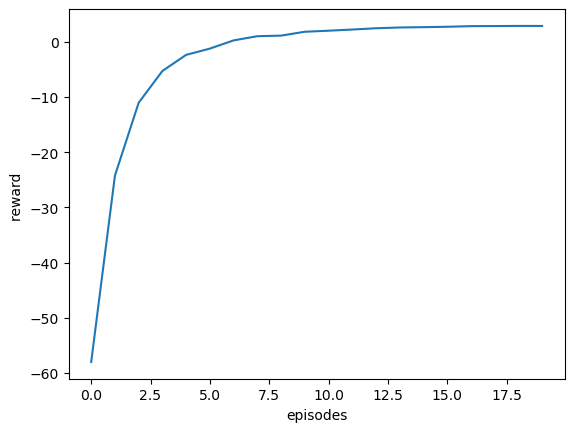

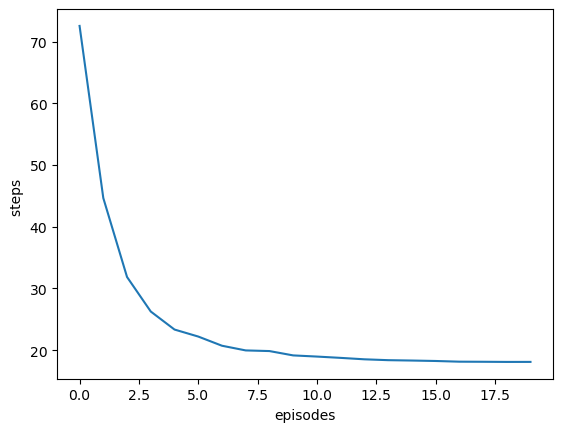

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def action_decode(act_code):
    dirs = {0: "N", 1: "E", 2: "S", 3: "W"}
    return dirs[act_code]

def action_encode(act):
    dir_codes = {"N": 0, "E": 1, "S": 2, "W": 3}
    return dir_codes(act)

def display_learning(series, label):
    n_episodes = len(series)
    show_n = 20
    show_step = int(n_episodes/show_n)
    sequence = []
    for i in range(show_n):
        sequence.append(np.mean(series[show_step*i:show_step*(i+1)]))
        print((i+1) * show_step,'(', i, ')', ' episodes ', label, sequence[-1]) # I added "(i)" to read graph easier
    print('\n')
    plt.figure()
    plt.plot(sequence)
    plt.ylabel(label)
    plt.xlabel('episodes')

class grid_env():
### definition of the maze environment

    def __init__(self, width = 5, height = 5, start = [0, 0], debug = False):
        # Contructor methods create the environment with some given options
        self.width = width
        self.height = height
        self.start = start
        self.goal = [self.width - 1, self.height - 1]
        self.debug = debug
        self.n_states = self.width * self.height
        self.reset()
        
    def reset(self):
        # Reset method puts the state at the starting position
        self.pos = self.start[:]   # columns, rows
        return self.pos, 0, False        

    def state_decode(self, obs_code):
        r = obs_code // self.width
        c = obs_code % self.width
        return([c, r])
    
    def state_encode(self, position):
        code = position[0] + position[1] * (self.width) # columns, rows
        return(code)

    def step(self, action):
        # Depending on the action, update the environment state
        if action == "S" and (self.pos[1] < self.height -1):
            self.pos[1] += 1
        elif action == "N" and self.pos[1] > 0:
            self.pos[1] -= 1
        elif action == "W" and self.pos[0] > 0:
            self.pos[0] -= 1
        elif action == "E" and (self.pos[0] < self.width -1):
            self.pos[0] += 1

        done = (self.pos == self.goal)  # check if goal was reached
        if done:
            reward = self.width + self.height  # reward at goal
        else:
            reward = -1  # negative reward at every step

        if self.debug:
            print(self.render())

        return self.pos, reward, done

    def render(self):
        res = ""
        for y in range(self.height):
            for x in range(self.width):
                if self.goal[0] == x and self.goal[1] == y:
                    if self.pos[0] == x and self.pos[1] == y:
                        res += "@"
                    else:
                        res += "o"
                    continue
                if self.pos[0] == x and self.pos[1] == y:
                    res += "x"
                else:
                    res += "_"
            res += "\n"
        return(res)

class agent():
### definition of the agent

    def __init__(self, n_obs, discount = 1, learning_rate = 0.1, eps = {'start': 1, 'min': 0.01, 'decay': 0.001}):
        self.action_space = np.asarray([0, 1, 2, 3])  # north, east, south, west
        n_actions = np.shape(self.action_space)[0]
        self.Q_table = np.zeros((n_obs, n_actions))

        self.epsilon = eps['start']   #initialize the exploration probability to 1
        self.epsilon_decay = eps['decay']   #exploration decreasing decay for exponential decreasing
        self.epsilon_min = eps['min']   # minimum of exploration proba
        
        self.gamma = discount   #discounted factor
        self.alpha = learning_rate   #learning rate
    
    def action_selection(self, state):
        if np.random.uniform(0,1) < self.epsilon:
            action = self.action_space[np.random.randint(0, 3)]   # choose a random action with probability epsilon
        else:
            action = np.argmax(self.Q_table[state,:])  # choose the best action for that state with prob 1-epsilon
        return(action)

    def policy_update(self, action, reward, state, next_state):
        self.Q_table[state, action] = (1 - self.alpha) * self.Q_table[state, action] + self.alpha*(reward + self.gamma*max(self.Q_table[next_state,:]))

    def decrease_exploration(self, e):
        self.epsilon = max(self.epsilon_min, np.exp(-self.epsilon_decay*e))
        
    def test_agent(self, env):
        state, _, done = env.reset()
        steps = 0
        while not done and steps < 100:
            action = ag.action_selection(env.state_encode(state))
            next_state, reward, done = env.step(action_decode(action))
            steps += 1
        print(steps)

    def train(self, env, n_episodes = 1000, max_steps = 100):
        all_rewards = []
        all_steps = []
        for e in range(n_episodes):   # iterate over episodes
            state, _, done = env.reset()
            trial_reward = 0
            t = 0
            while not done and t < max_steps:
                action = ag.action_selection(env.state_encode(state))  # step 1: choose an action
                old_state = state[:]
                next_state, reward, done = env.step(action_decode(action))    # steps 2 and 3: The environment runs the chosen action and returns next state and reward
                ag.policy_update(action, reward, env.state_encode(old_state), env.state_encode(next_state))  # step 4: policy update
                trial_reward += reward
                t += 1
            ag.decrease_exploration(e)
            all_rewards.append(trial_reward)
            all_steps.append(t)
        return(all_rewards, all_steps)


maze_height = 10
maze_width = 10
start = [0, 0]
maze = grid_env(maze_height, maze_width, start)

epsilon = {'start': 1, 'min': 0.01, 'decay': 0.001} 
ag = agent(maze.n_states, eps = epsilon) 
episodes = 5000
steps = 100
[rewards, steps] = ag.train(maze, episodes, steps)

display_learning(rewards, "reward ")
display_learning(steps, "steps ")

print(ag.Q_table)

maze = grid_env(maze_height, maze_width, start, debug = True)
ag.test_agent(maze)


**Run the code below to see the agent learning to reach the goal while avoiding a hole**

250 ( 0 )  episodes  reward  -208.864
500 ( 1 )  episodes  reward  -58.648
750 ( 2 )  episodes  reward  19.868
1000 ( 3 )  episodes  reward  41.236
1250 ( 4 )  episodes  reward  63.184
1500 ( 5 )  episodes  reward  67.344
1750 ( 6 )  episodes  reward  72.696
2000 ( 7 )  episodes  reward  75.472
2250 ( 8 )  episodes  reward  75.764
2500 ( 9 )  episodes  reward  79.18
2750 ( 10 )  episodes  reward  80.248
3000 ( 11 )  episodes  reward  81.744
3250 ( 12 )  episodes  reward  81.604
3500 ( 13 )  episodes  reward  82.464
3750 ( 14 )  episodes  reward  82.228
4000 ( 15 )  episodes  reward  82.156
4250 ( 16 )  episodes  reward  82.816
4500 ( 17 )  episodes  reward  82.696
4750 ( 18 )  episodes  reward  82.896
5000 ( 19 )  episodes  reward  82.492


250 ( 0 )  episodes  steps  67.78
500 ( 1 )  episodes  steps  40.26
750 ( 2 )  episodes  steps  29.976
1000 ( 3 )  episodes  steps  26.248
1250 ( 4 )  episodes  steps  23.508
1500 ( 5 )  episodes  steps  21.896
1750 ( 6 )  episodes  steps  21.052
20

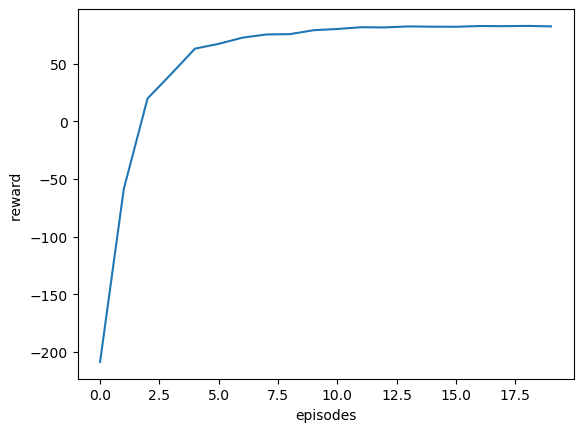

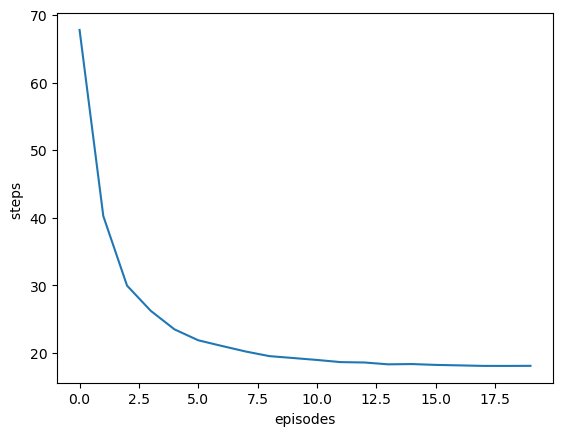

In [3]:
# Now we're going to simulate the presence of a hole in the maze. We're going to copy the class grid_env() and 
#perform the proper changes, which are going to be commented to easily spot and interpret those

class grid_env():

    def __init__(self, width = 5, height = 5, start = [0, 0], debug = False):
        self.width = width
        self.height = height
        self.start = start
        self.goal = [self.width - 1, self.height - 1]
        self.hole = [9,3]     # I created this variable that simulate the hole
        self.debug = debug
        self.n_states = self.width * self.height
        self.reset()
        
    def reset(self):
        self.pos = self.start[:]   
        return self.pos, 0, False        

    def state_decode(self, obs_code):
        r = obs_code // self.width
        c = obs_code % self.width
        return([c, r])
    
    def state_encode(self, position):
        code = position[0] + position[1] * (self.width) 
        return(code)

    def step(self, action):
        if action == "S" and (self.pos[1] < self.height -1):
            self.pos[1] += 1
        elif action == "N" and self.pos[1] > 0:
            self.pos[1] -= 1
        elif action == "W" and self.pos[0] > 0:
            self.pos[0] -= 1
        elif action == "E" and (self.pos[0] < self.width -1):
            self.pos[0] += 1

        done = (self.pos == self.goal)
        damage = (self.pos == self.hole) # Creating variable that compares current position with the hole
        if done:
            reward = 100 
        elif damage:     # Asking if the current position equals to where the hole is
            reward = -50 # If true, this punish will be implemente to the reward system
        else:
            reward = -1  

        if self.debug:
            print(self.render())

        return self.pos, reward, done

    def render(self):
        res = ""
        for y in range(self.height):
            for x in range(self.width):
                if self.goal[0] == x and self.goal[1] == y:
                    if self.pos[0] == x and self.pos[1] == y:
                        res += "@"
                    else:
                        res += "o"
                    continue
                if self.pos[0] == x and self.pos[1] == y:
                    res += "x"
                elif self.hole[0] == x and self.hole[1] == y: 
                    res += "#"                # Here we place the hole "#" in the maze
                else:
                    res += "_"                  
                                   
            res += "\n"    
        return(res)
    
# To run the maze
    
maze_height = 10
maze_width = 10
start = [0, 0]
maze = grid_env(maze_height, maze_width, start)

epsilon = {'start': 1, 'min': 0.01, 'decay': 0.001} 
ag = agent(maze.n_states, eps = epsilon) 
episodes = 5000
steps = 100
[rewards, steps] = ag.train(maze, episodes, steps)

display_learning(rewards, "reward ")
display_learning(steps, "steps ")

print(ag.Q_table)

maze = grid_env(maze_height, maze_width, start, debug = True)
ag.test_agent(maze)    

**Run the code below to see the agent learning to reach the goal while avoiding multiple holes**

250 ( 0 )  episodes  reward  -427.944
500 ( 1 )  episodes  reward  -141.192
750 ( 2 )  episodes  reward  -69.596
1000 ( 3 )  episodes  reward  -17.18
1250 ( 4 )  episodes  reward  14.928
1500 ( 5 )  episodes  reward  28.804
1750 ( 6 )  episodes  reward  46.8
2000 ( 7 )  episodes  reward  55.96
2250 ( 8 )  episodes  reward  60.72
2500 ( 9 )  episodes  reward  63.416
2750 ( 10 )  episodes  reward  69.96
3000 ( 11 )  episodes  reward  71.152
3250 ( 12 )  episodes  reward  75.164
3500 ( 13 )  episodes  reward  77.9
3750 ( 14 )  episodes  reward  77.536
4000 ( 15 )  episodes  reward  79.488
4250 ( 16 )  episodes  reward  80.592
4500 ( 17 )  episodes  reward  80.568
4750 ( 18 )  episodes  reward  80.98
5000 ( 19 )  episodes  reward  81.42


250 ( 0 )  episodes  steps  71.348
500 ( 1 )  episodes  steps  43.62
750 ( 2 )  episodes  steps  33.592
1000 ( 3 )  episodes  steps  28.02
1250 ( 4 )  episodes  steps  25.312
1500 ( 5 )  episodes  steps  23.588
1750 ( 6 )  episodes  steps  21.86
2000 ( 7 

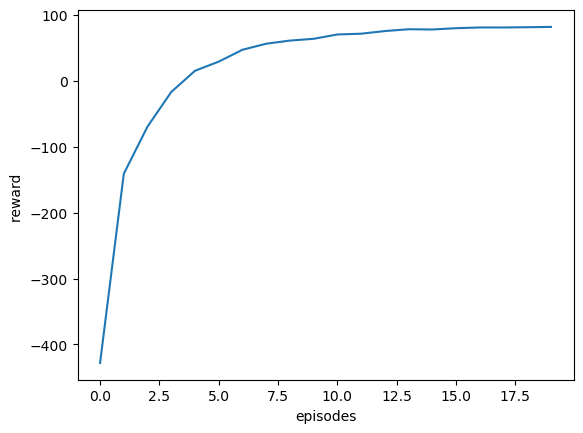

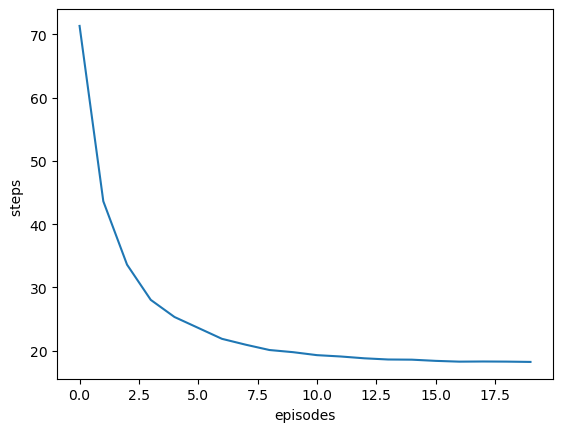

In [15]:
# What would happen if we add more holes to the maze?
# We're going to take the same code and change it to add more holes
class grid_env():

    def __init__(self, width = 5, height = 5, start = [0, 0], debug = False):
        self.width = width
        self.height = height
        self.start = start
        self.goal = [self.width - 1, self.height - 1]
        self.hole = [(9,3), (8,3), (7,3), (6,3), (5,3), (3,3), (2,3), (1,3), (9,3), (2,5), \
          (6,1), (2,4), (0,3), (3,3), (0,7), (4,9)]   # Adding more holes
        self.debug = debug
        self.n_states = self.width * self.height
        self.reset()
        
    def reset(self):
        self.pos = self.start[:]   
        return self.pos, 0, False        

    def state_decode(self, obs_code):
        r = obs_code // self.width
        c = obs_code % self.width
        return([c, r])
    
    def state_encode(self, position):
        code = position[0] + position[1] * (self.width) 
        return(code)

    def step(self, action):
        if action == "S" and (self.pos[1] < self.height -1):
            self.pos[1] += 1
        elif action == "N" and self.pos[1] > 0:
            self.pos[1] -= 1
        elif action == "W" and self.pos[0] > 0:
            self.pos[0] -= 1
        elif action == "E" and (self.pos[0] < self.width -1):
            self.pos[0] += 1

        done = (self.pos == self.goal)
        if (self.pos[0], self.pos[1]) in self.hole: # Checking if agent is in a hole
            damage = True;
        else:
            damage = False;
            
        if done:
            reward = 100 
        elif damage:     
            reward = -50 
        else:
            reward = -1  

        if self.debug:
            print(self.render())

        return self.pos, reward, done

    def render(self):
        res = ""
        for y in range(self.height):
            for x in range(self.width):
                if self.goal[0] == x and self.goal[1] == y:
                    if self.pos[0] == x and self.pos[1] == y:
                        res += "@"
                    else:
                        res += "o"
                    continue
                      
                if self.pos[0] == x and self.pos[1] == y:
                        res += "x"                              
                elif (x,y) in self.hole:         # Updated this condition to check entire array of hole
                       res += "#"                # Here we place the hole "#" in the maze
                else:
                        res += "_"                  
                                   
            res += "\n"    
        return(res)
    
# To run the maze
    
maze_height = 10
maze_width = 10
start = [0, 0]
maze = grid_env(maze_height, maze_width, start)

epsilon = {'start': 1, 'min': 0.01, 'decay': 0.001} 
ag = agent(maze.n_states, eps = epsilon) 
episodes = 5000
steps = 100
[rewards, steps] = ag.train(maze, episodes, steps)

display_learning(rewards, "reward ")
display_learning(steps, "steps ")

print(ag.Q_table)

maze = grid_env(maze_height, maze_width, start, debug = True)
ag.test_agent(maze)    
